<a href="https://colab.research.google.com/github/coryroyce/code_assignments/blob/main/211030_Starbucks_Clustering_Cory_Randolph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Starbucks Clustering Assignment

CMPE 256

Cory Randolph

10/30/2021



# Prompt

A newly opened Starbucks coffee shop manager wanted to increase loyal customer to his newly opened shop. As part of increasing customer loyalty, he collected data of sale of hot beverages vs popular times of a typical day - in this case Wednesday. The goal of the manager is to offer a sales coupons to customers based on time visit to the store.

He consulted you, data scientist, and wanted you to develop clustering (maximum three popular time slots of the day to offer coupon). How do you approach?

Part B: Please upload Cluster Source code & Output for Single Link, Complete Link and Average Link. (10)

# Summary of Analysis

For this project, I first clustered the various points together to see what times and beverages are most popular.
Comparing the Single, Complete and Average Cluster the version that I have chosen for this project is the Average Link method since It would be best to choose 3 coupon times that provide the most customers on average.

See Graph:

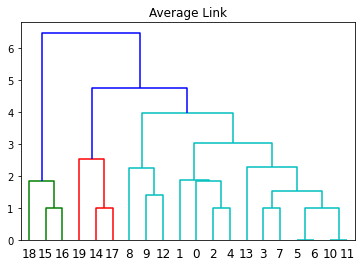

Point #6, Point #2, and Point #9 have early forming clusters and would capture the most amount of customers for the coupon to apply to and may be easier to have other customers change the time they come to come during that specific time window.

See Review results at the end of the code for below lookup information:

Point #2 Popular time index is '7am-8am' and Beverage is 'Cafe Americano'

Point #6 Popular Time Index is '8am-9am' and beverage is 'Espresso Shot'

Point #9 Popular Time index is '9am-10am' and beverage is 'Caramel Macchiato'

After reviewing this data, since the primary three clusters chosen are all in the morning I may choose to change one of them to an afternoon coupon to capture more of that grouping.

**Potential Further Analysis**
Potential cluster beverages on Caffeinated or non-caffeinated to see if coupons could be made for particular types of drinks.


# Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

# Data

Convert the data into list pairs for the Hot Beverage Index and also the Popular Times Index.

In [2]:
hot_beverage_index = [
  [1,'CoffeeType'],
  [2,'Cafe Latte'],
  [3,'Cafe Mocha'],
  [4,'Cappuccino'],
  [5,'Caramel Macchiato'],
  [6,'Cafe Americano'],
  [7,'Hot Chocolate'],
  [8,'Espresso Shot'],
  [9,'Coffee Of the Day'],
]

In [3]:
popular_times_index = [
  [1,'6 am - 7 am'],
  [2,'7 am - 8 am'],
  [3,'8 am - 9 am'],
  [4,'9 am - 10 am'],
  [5,'10 am - 12 pm'],
  [6,'12 pm - 1 pm'],
  [7,'1 pm - 3 pm'],
  [8,'3 pm - 4 pm'],
  [9,'4 pm - 7 pm'],
  [10,'7 pm - 8 pm'],
  [11,'8 pm - 9 pm'],
]

Define the data points collected from the time of day purchases on Wednesday

In [19]:
data_points = [
  [1,5],
  [1,7],
  [2,6],
  [2,9],
  [3,6],
  [3,8],
  [3,8],
  [3,9],
  [4,8],
  [4,8],
  [3,3],
  [5,4],
  [7,2],
  [5,7],
  [4,5],
  [6,9],
  [7,3],
  [7,9],
  [8,1],
  [8,7],
]

df = pd.DataFrame(data_points, columns = ['Popular_Times_Index', 'Hot_Beverages_Index'])

# Sort and re-index the data so that it goes in chronlocal order based on popular times.
# This will make it easier when looling at the cluster dendrograms to have a sense of time order.
df = df.sort_values(by=['Popular_Times_Index'])
df.reset_index(drop=True, inplace=True)

In [20]:
df.head(3)

,Popular_Times_Index,Hot_Beverages_Index
0,1,5
1,1,7
2,2,6


Recreate the graph

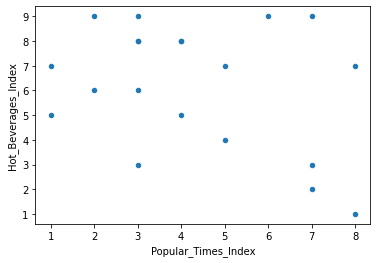

In [21]:
df.plot.scatter(x = 'Popular_Times_Index', y = 'Hot_Beverages_Index')

# Apply Clustering

## Single Link Cluster

Use the scipy library for clusering and dendrogram visualization

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from scipy.spatial import distance_matrix

Calcualte the distance matrix

In [23]:
dist_matrix = distance_matrix(df.to_numpy(), df.to_numpy())

Visualize as pandas dataframe

In [24]:
pd.DataFrame(dist_matrix).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,2.000000,1.414214,4.123106,2.236068,3.605551,3.605551,4.472136,2.828427,3.000000,4.242641,4.242641,4.123106,4.472136,6.403124,6.708204,6.324555,7.211103,8.062258,7.280110
1,2.000000,0.000000,1.414214,2.236068,2.236068,2.236068,2.236068,2.828427,4.472136,3.605551,3.162278,3.162278,5.000000,4.000000,5.385165,7.810250,7.211103,6.324555,9.219544,7.000000
2,1.414214,1.414214,0.000000,3.000000,1.000000,2.236068,2.236068,3.162278,3.162278,2.236068,2.828427,2.828427,3.605551,3.162278,5.000000,6.403124,5.830952,5.830952,7.810250,6.082763
3,4.123106,2.236068,3.000000,0.000000,3.162278,1.414214,1.414214,1.000000,6.082763,4.472136,2.236068,2.236068,5.830952,3.605551,4.000000,8.602325,7.810250,5.000000,10.000000,6.324555
4,2.236068,2.236068,1.000000,3.162278,0.000000,2.000000,2.000000,3.000000,3.000000,1.414214,2.236068,2.236068,2.828427,2.236068,4.242641,5.656854,5.000000,5.000000,7.071068,5.099020


Apply square form to remove the 0's and symetric duplicates

In [25]:
distances = squareform(dist_matrix)

Create a single linked cluster

In [26]:
linkage_single = linkage(distances, 'single')

Create a dendogram to visualize

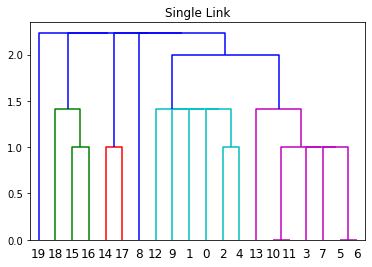

In [27]:
dendrogram(linkage_single)
# Label the dendrogram
plt.title('Single Link')
plt.show()

## Complete Link Cluster

Since the data, distance and labels are all the same we just need to update the last few lines of code to get the other types of linkages.

Create an Complete linked cluster

In [28]:
linkage_complete = linkage(distances, 'complete')

Create a dendogram to visualize

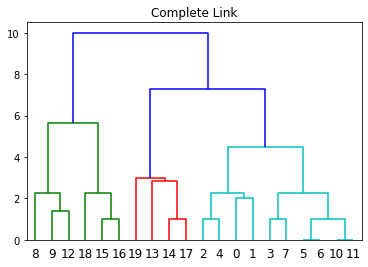

In [29]:
dendrogram(linkage_complete)
# Label the dendrogram
plt.title('Complete Link')
plt.show()

## Average Link Cluster

Since the data, distance and labels are all the same we just need to update the last few lines of code to get the other types of linkages.

Create an average linked cluster

In [30]:
linkage_average = linkage(distances, 'average')

Create a dendogram to visualize

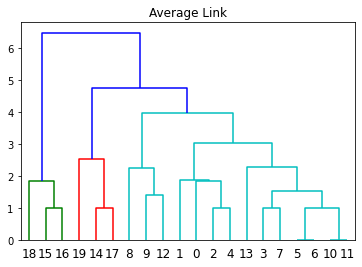

In [31]:
dendrogram(linkage_average)
# Label the dendrogram
plt.title('Average Link')
plt.show()

# Rreview Results

See summary of analysis for full details.

Below are the calculations for the selected time slots. 
Point #6, Point #2, and Point #9

In [38]:
popular_times_index

[[1, '6 am - 7 am'],
 [2, '7 am - 8 am'],
 [3, '8 am - 9 am'],
 [4, '9 am - 10 am'],
 [5, '10 am - 12 pm'],
 [6, '12 pm - 1 pm'],
 [7, '1 pm - 3 pm'],
 [8, '3 pm - 4 pm'],
 [9, '4 pm - 7 pm'],
 [10, '7 pm - 8 pm'],
 [11, '8 pm - 9 pm']]

In [40]:
hot_beverage_index

[[1, 'CoffeeType'],
 [2, 'Cafe Latte'],
 [3, 'Cafe Mocha'],
 [4, 'Cappuccino'],
 [5, 'Caramel Macchiato'],
 [6, 'Cafe Americano'],
 [7, 'Hot Chocolate'],
 [8, 'Espresso Shot'],
 [9, 'Coffee Of the Day']]

In [36]:
point_2 = df.loc[2]
print(point_2)

Popular_Times_Index    2
Hot_Beverages_Index    6
Name: 2, dtype: int64


Point #2 Popular time index is '7am-8am' and Beverage is 'Cafe Americano'


In [37]:
point_6 = df.loc[6]
print(point_6)

Popular_Times_Index    3
Hot_Beverages_Index    8
Name: 6, dtype: int64


Point #6 Popular Time Index is '8am-9am' and beverage is 'Espresso Shot'

In [39]:
point_9 = df.loc[9]
print(point_9)


Popular_Times_Index    4
Hot_Beverages_Index    5
Name: 9, dtype: int64


Point #9 Popular Time index is '9am-10am' and beverage is 'Caramel Macchiato'